### Basic Python for 4D-STEM
# Working with .npz files

This notebook shows how to:
 - open **.npz files** (numpy data archives, one of the LiberTEM export options), 
 - visualize the data within them, 
 - and store results in another format. 
 
Created for the workshop, held at Jožef Stefan Institute on June 14, 2023.

Author: Ana Rebeka Kamšek, National Institute of Chemistry, Slovenia

First, we import the libraries we need.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Let's specify the data path and load the data using the **np.load** function. 

In [2]:
data_path = "results.npz"
f = np.load(data_path)
print(f)

When we tried printing the np.load results, a NpzFile object was returned. We still need to access the data stored within it. 
The file can contain data, stored under several names. If we do not know those in advance, we can print them out.

In [3]:
list(f.keys())

['intensity', 'intensity_log']

In this case, we have two arrays stored under two different keywords. We can access the data under each keyword using square brackets on the file object.

In [4]:
image = f['intensity']
print(image.dtype)
print(image.shape)

float32
(64, 64)


We loaded an array of floats (numerical values) with the shape (64, 64). This can now be used for visualization with matplotlib. 

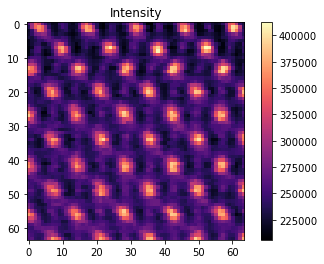

In [5]:
plt.figure()
plt.imshow(image, cmap='magma')
plt.title('Intensity')
plt.colorbar()

The data can be manipulated using mathematical functions. For example, we can **normalize** the values between 0 and 1 using the maximum and minimum values found in our array.

0.0 1.0


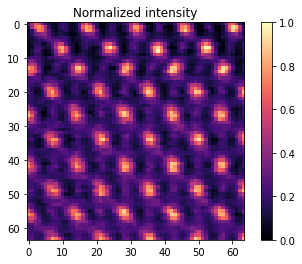

In [6]:
max_value = np.amax(image)
min_value = np.amin(image)

image_normalized = (image - min_value) / (max_value - min_value)
print(np.amin(image_normalized), np.amax(image_normalized))

plt.figure()
plt.imshow(image_normalized, cmap='magma')
plt.title('Normalized intensity')
plt.colorbar()

To enhance lower intensity features, we can, for example, visualize the **logarithm** of the data.

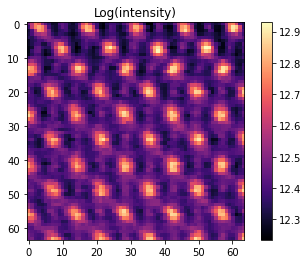

In [7]:
plt.figure()
plt.imshow(np.log(image), cmap='magma')
plt.title('Log(intensity)')
plt.colorbar()

In case we are only interested in one part of the image, we can **crop** it using array indexing.

(32, 16)


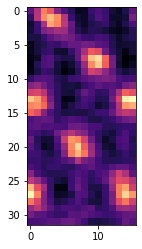

In [8]:
new_shape = (int(image.shape[0] / 2), int(image.shape[1] / 4))
print(new_shape)

plt.figure()
plt.imshow(image[:new_shape[0], :new_shape[1]], cmap='magma')

The data can be stored in a number of different formats, for example as a **.csv** file that can be opened by other software, using the **np.savetxt** function. 
This requires us to specify the new file name, our intent to write the data, what data we are storing and the delimiter for separating columns. Besides comma, we could also use spaces, tabs, etc. 

In [9]:
with open('results.csv', 'w') as g:
    np.savetxt(g, image, delimiter=',')